import data

In [27]:
import os
import functions 
from functions import *
from glob import glob
import numpy as np
from hmmlearn import hmm
import pandas as pd
import matplotlib.pyplot as plt

h5_files = sorted(glob('*.h5'))
data_auto1_filt,data_auto2_filt = functions.getfiltereddata(h5_files)

fish1=data_auto1_filt


/Users/ryan/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:8767: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/Users/ryan/Desktop/Fish Project/functions.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_auto2_filt['A_head']['x'] = data_auto2_filt['A_head']['x'] + 500
/Users/ryan/Desktop/Fish Project/functions.py:99: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

calculate possible obs, I fill NAs with the forward values, which includes
- periculum: the periculum
- angle:angle between 2 fish
- periculum_speed: the "derivative" of periculum obtained from set difference with the previous value, devided by 1/fps
- movement_speed: the fish's movement speed
- turning_angle: fish's turning angle, compared to it's orientation in a second before
- max periculum: describes fish's periculum's maximun from previous 40s to future 40s
- orietation: orietation defined by Yuqi
- error: I tried to fit a sine curve for the periculum change when they can see each other, and fit it with the whole data, and calculate the error term( it actually works out badly)

In [28]:
periculum=functions.auto_scoring_get_opdeg(data_auto1_filt)
periculum=periculum.fillna(method="ffill")
angle=functions .gaze_tracking(data_auto1_filt,data_auto2_filt)
periculum_speed=periculum_speed(periculum)
movement_speed=speed(data_auto1_filt)
movement_speed=movement_speed.fillna(method="ffill")
turning_angle=turning_angle(data_auto1_filt)
turning_angle=pd.Series(turning_angle)
turning_angle=turning_angle.fillna(method="ffill")
max_per=find_local_max_per(periculum,width=40)
max_per=pd.Series(max_per)
error=find_error(periculum)
ori=orientation2(data_auto1_filt)
ori=pd.Series(ori)
ori=ori.fillna(method="bfill")

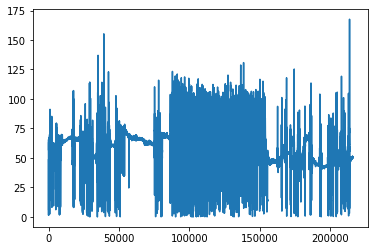

In [29]:
plt.plot(periculum)

(array([15592., 12849., 12865., 12756., 18540., 20584., 19717., 25006.,
        36828., 30176.]),
 array([0.0010744218105053134, 18.00086188415101, 36.00064934649152,
        54.00043680883203, 72.00022427117253, 90.00001173351303,
        107.99979919585354, 125.99958665819405, 143.99937412053455,
        161.99916158287508, 179.99894904521557], dtype=object),
 <a list of 10 Patch objects>)

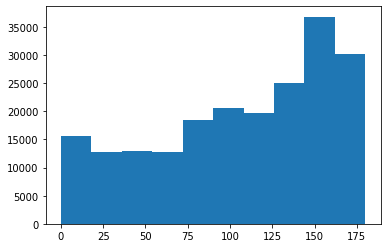

In [30]:
plt.hist(angle)

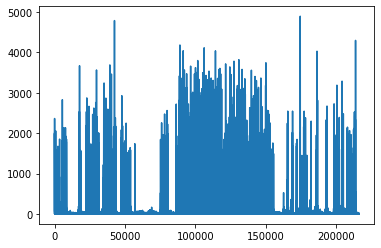

In [32]:
plt.plot(periculum_speed)

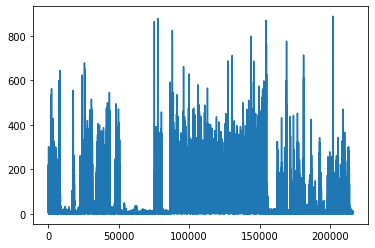

In [35]:
plt.plot(movement_speed)

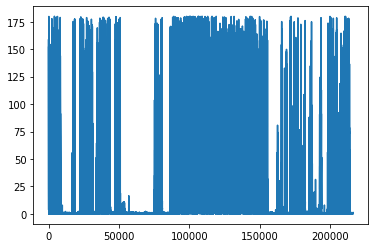

In [36]:
plt.plot(turning_angle)

(array([7.0379e+04, 5.8831e+04, 4.7781e+04, 2.9948e+04, 6.3770e+03,
        1.4860e+03, 1.0480e+03, 2.0700e+02, 1.0000e+00, 4.0000e+00]),
 array([5.43285701e-05, 1.25957653e+01, 2.51914762e+01, 3.77871872e+01,
        5.03828981e+01, 6.29786091e+01, 7.55743201e+01, 8.81700310e+01,
        1.00765742e+02, 1.13361453e+02, 1.25957164e+02]),
 <a list of 10 Patch objects>)

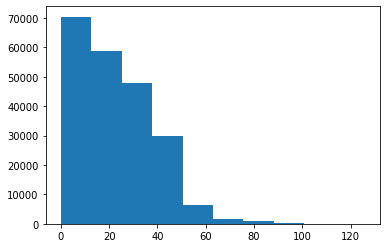

In [38]:
plt.hist(error)

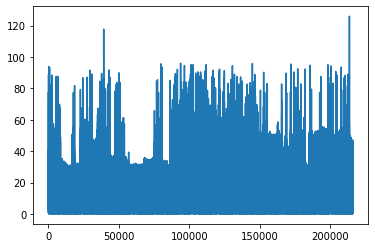

In [39]:
plt.plot(error)

(array([ 18836.,  11361.,   6574.,   9992.,   7220.,   7588.,   9890.,
         19535.,  21706., 103360.]),
 array([-1.00000000e+00, -8.00000000e-01, -6.00000000e-01, -4.00000000e-01,
        -2.00000000e-01, -1.08220655e-10,  2.00000000e-01,  4.00000000e-01,
         6.00000000e-01,  8.00000000e-01,  1.00000000e+00]),
 <a list of 10 Patch objects>)

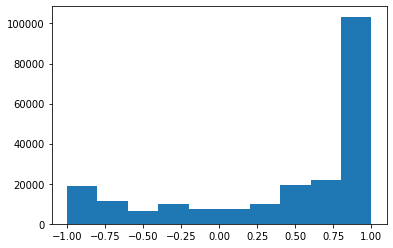

In [40]:
plt.hist(ori)

HMM for peri_speed and angle

Text(0.5, 0, 'time')

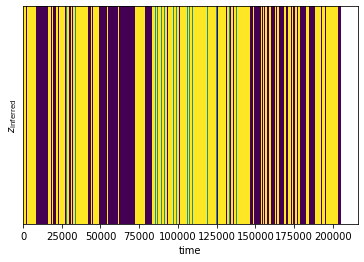

In [3]:
obs=np.vstack((periculum_speed,angle)).T
obs=obs.astype(float)
obs=obs[~np.isnan(obs).any(axis=1)]
N_iters = 50
num_states=3
obs_dim=1

hmm_3=hmm.GaussianHMM(n_components=num_states, covariance_type="full", n_iter=100)
hmm_3.fit(obs[:,0].reshape(-1,1))

hmm_z=hmm_3.predict(obs[:,0].reshape(-1,1))


Text(0.5, 0, 'time')

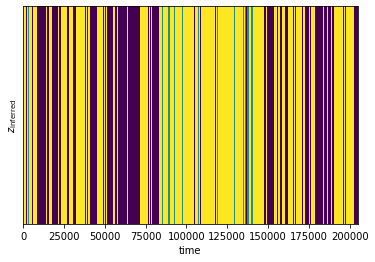

In [7]:
plt.imshow(hmm_z[None,:], aspect="auto")
plt.ylabel("$z_{\\mathrm{inferred}}$")
plt.yticks([])
plt.xlabel("time")

HMM for error term and orientation, gives a very weird result

Text(0.5, 0, 'time')

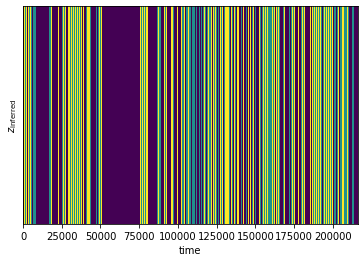

In [8]:
obs2=np.vstack((error,ori)).T
obs2=obs2.astype(float)
obs2=obs2[~np.isnan(obs2).any(axis=1)]
'''fitting 3 states model with predict error and orientation'''
N_iters = 50
num_states=3
obs_dim=2

hmm_3=hmm.GaussianHMM(n_components=num_states, covariance_type="full", n_iter=100)
hmm_3.fit(obs2)


hmm_z=hmm_3.predict(obs2)
plt.imshow(hmm_z[None,:], aspect="auto")
plt.ylabel("$z_{\\mathrm{inferred}}$")
plt.yticks([])
plt.xlabel("time")

HMM for periculum_speed and orientation

Text(0.5, 0, 'time')

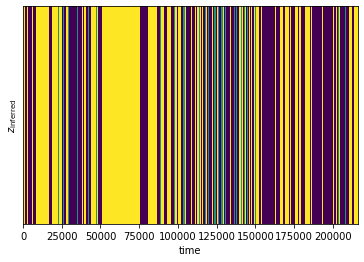

In [9]:
obs=np.vstack((periculum_speed,ori)).T
obs=obs.astype(float)
obs=obs[~np.isnan(obs).any(axis=1)]
N_iters = 50
num_states=3
obs_dim=2

hmm_3=hmm.GMMHMM(n_components=num_states, covariance_type="full", n_iter=100)
hmm_3.fit(obs)
hmm_z=hmm_3.predict(obs)
time_bins=216062
plt.imshow(hmm_z[None,:], aspect="auto")
plt.xlim(0, time_bins)
plt.ylabel("$z_{\\mathrm{inferred}}$")
plt.yticks([])
plt.xlabel("time")

HMM for movement_speed and turning_angle

Text(0.5, 0, 'time')

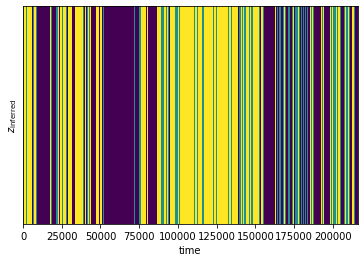

In [10]:
obs=np.vstack((movement_speed,turning_angle)).T
obs=obs.astype(float)
obs=obs[~np.isnan(obs).any(axis=1)]
num_states=3

hmm_3=hmm.GMMHMM(n_components=num_states, covariance_type="full", n_iter=100)
hmm_3.fit(obs)

hmm_z=hmm_3.predict(obs)
time_bins=216061
plt.imshow(hmm_z[None,:], aspect="auto")
plt.xlim(0, time_bins)
plt.ylabel("$z_{\\mathrm{inferred}}$")
plt.yticks([])
plt.xlabel("time")

HMM for local max periculum and angle, local maximum for periculum gives a stabler result over time

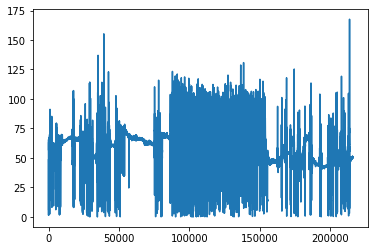

In [12]:
plt.plot(periculum)

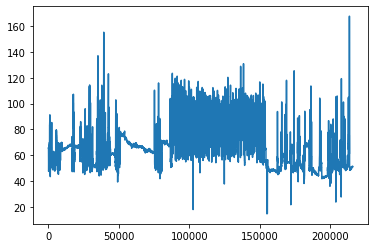

In [11]:
plt.plot(max_per)

In [3]:
obs=np.vstack((max_per,angle)).T
obs=obs.astype(float)
obs=obs[~np.isnan(obs).any(axis=1)]

Text(0.5, 0, 'time')

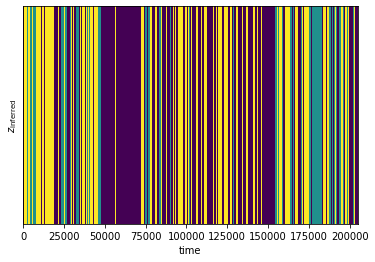

In [13]:
hmm_3=hmm.GMMHMM(n_components=num_states, covariance_type="full", n_iter=100)
hmm_3.fit(obs)

hmm_z=hmm_3.predict(obs)
plt.imshow(hmm_z[None,:], aspect="auto")
plt.ylabel("$z_{\\mathrm{inferred}}$")
plt.yticks([])
plt.xlabel("time")

HMM for only max_per, which gives the clearest result, guess it's because this feature is more stable for different states.

Text(0.5, 0, 'time')

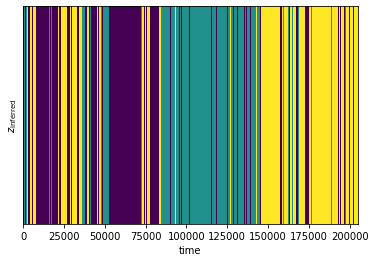

In [5]:
num_states=3
hmm_3=hmm.GaussianHMM(n_components=num_states, covariance_type="full", n_iter=100)
hmm_3.fit(obs[:,0].reshape(-1,1))

hmm_z=hmm_3.predict(obs[:,0].reshape(-1,1))
plt.imshow(hmm_z[None,:], aspect="auto")
plt.ylabel("$z_{\\mathrm{inferred}}$")
plt.yticks([])
plt.xlabel("time")

But the AIC, BIC curve looks the same

In [23]:
from information_criteria import *

In [24]:
model_aic=[]
model_bic=[]

In [25]:
obs=obs[:,0].reshape(-1,1)

In [27]:
obs_dim=1
for i in range(2,9):
    num_states=i
    hmm_state=hmm.GaussianHMM(n_components=num_states, covariance_type="full", n_iter=100)
    hmm_state.fit(obs)
    model_aic.append(AIC(hmm_state,obs,obs_dim))
    model_bic.append(BIC(hmm_state,obs,obs_dim))

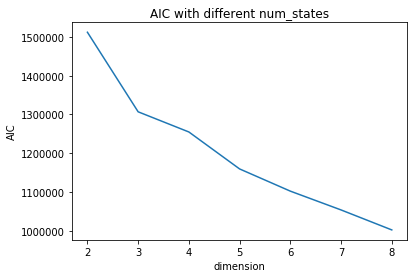

In [28]:
dimension=list(range(2,9))
plt.plot(dimension,model_aic)
plt.title("AIC with different num_states")
plt.xlabel("dimension")
plt.ylabel("AIC")
plt.show()

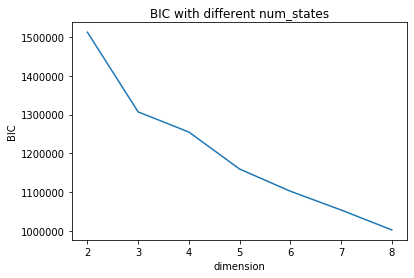

In [29]:
plt.plot(dimension,model_bic)
plt.title("BIC with different num_states")
plt.xlabel("dimension")
plt.ylabel("BIC")
plt.show()

I tried to do a posterior predictive check in a bayesian way, by simulate data from the fitted model, and compare it(and its features) to the original data

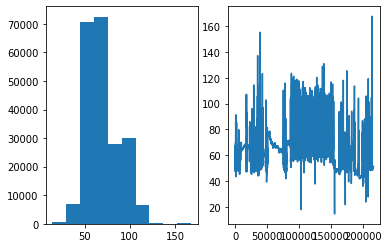

In [11]:
fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
ax.hist(max_per)
ax = fig.add_subplot(1, 2, 2)
ax.plot(max_per)

Set the starting state to be 2(calm), simulate 200000 samples

In [14]:
hmm_3.startprob_ = np.array([0.0, 0.0, 1])
X,y=hmm_3.sample(200000)

(array([3.5300e+02, 4.3678e+04, 5.5348e+04, 4.7486e+04, 1.9415e+04,
        2.0657e+04, 1.0307e+04, 2.4810e+03, 2.5200e+02, 2.3000e+01]),
 array([ 27.49724089,  39.94915834,  52.40107578,  64.85299323,
         77.30491067,  89.75682812, 102.20874556, 114.66066301,
        127.11258045, 139.5644979 , 152.01641535]),
 <a list of 10 Patch objects>)

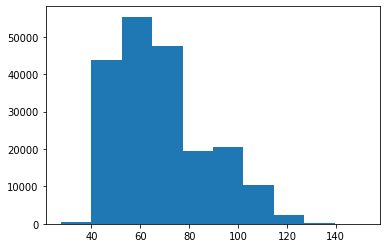

In [15]:
plt.hist(X)

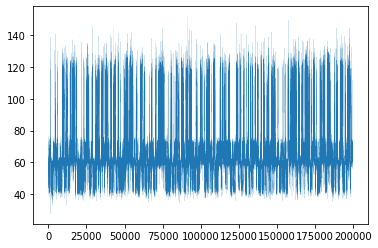

In [17]:
plt.plot(X,linewidth=0.1)

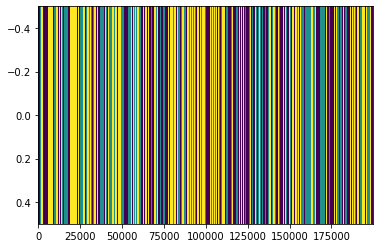

In [16]:
plt.imshow(y[None,:], aspect="auto")

Well unlike the true data, the simulated data is switches more between states, because the data isn't obtained by a random experiment, the fish start being aggressive only when they can see each other. But the distribution of max_per is similar in a sense.

In [25]:
data_wideOpen=len(max_per[max_per>100])

In [23]:
sim_open_length=[]
for i in range(100):
    X,y=hmm_3.sample(200000)
    sim_open_length.append(len(X[X>100]))

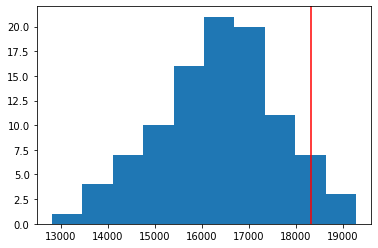

In [26]:
plt.hist(sim_open_length)
plt.axvline(x=data_wideOpen,color="red")